# Event Plots (inline version)

A NB template to ilustrate how to examine the features of events

In [45]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-04-11 11:13:23


In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import sys
import os
import time
import tables as tb
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from invisible_cities.database import load_db

In [49]:
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units

In [50]:
from invisible_cities.core.mpl_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, \
              plot_signal_vs_time_mus

In [51]:
from invisible_cities.reco.pmaps_functions import plot_s12

In [52]:
from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si

### Run Parameters

In [53]:
run_number = 3614

In [54]:
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values

In [58]:
RWF_file = os.path.join(os.environ['IC_DATA'],
                        'LSC/wvfms/{}/dst_waves.gdcsnext.000_{}.root.h5'.format(run_number, run_number))
print('RWF file = {}'.format(RWF_file))

RWF file = /Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3614/dst_waves.gdcsnext.000_3614.root.h5


In [59]:
h5rwf = tb.open_file(RWF_file,'r')

In [60]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)

In [61]:
NEVT, NPMT, PMTWL = pmtrwf.shape
NEVT, NSIPM, SIPMWL = sipmrwf.shape
print("""
        Number of events in file = {}
        Number of PMTs = {}
        PMTWL = {}
        Number of SiPMs = {}
        SiPMWL = {}
      """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))


        Number of events in file = 164
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      


In [176]:
s1par  = S12Params(tmin=0*units.mus, tmax=620*units.mus, lmin=5, lmax=20, stride=4, rebin=False)
s2par = S12Params(tmin=640*units.mus, tmax=1300*units.mus, stride=80, lmin=80, lmax=20000, rebin=True)
thr    = ThresholdParams(thr_s1=3 * units.pes,  thr_s2=1 *units.pes,
                        thr_MAU = 3 * units.adc, thr_sipm = 3.5 * units.pes,
                        thr_SIPM = 30 * units.adc)

In [177]:
epm = EventPmaps(run_number, s1par, s2par, thr, verbose=True)

In [99]:
event=0
epm.calibrated_pmt_and_csum(event, pmtrwf)

210354.47556176796

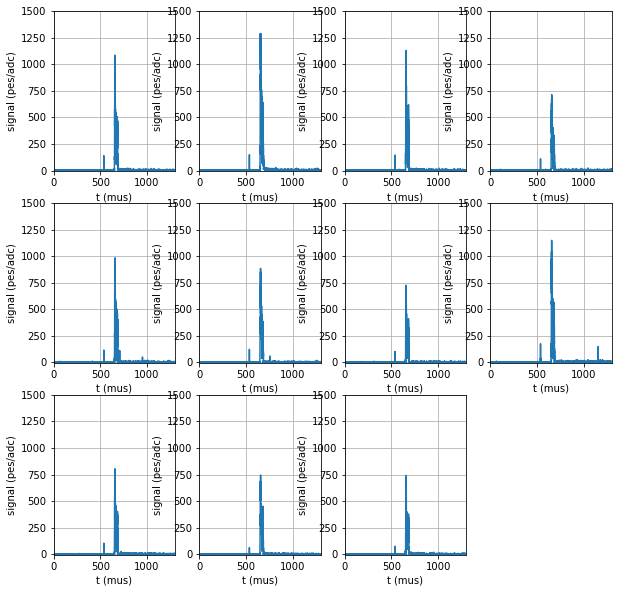

In [100]:
plot_pmt_signals_vs_time_mus(epm.CWF,
                                 epm.P.pmt_active,
                                 t_min      =    0,
                                 t_max      = 1300,
                                 signal_min =    -5,
                                 signal_max =  1500)

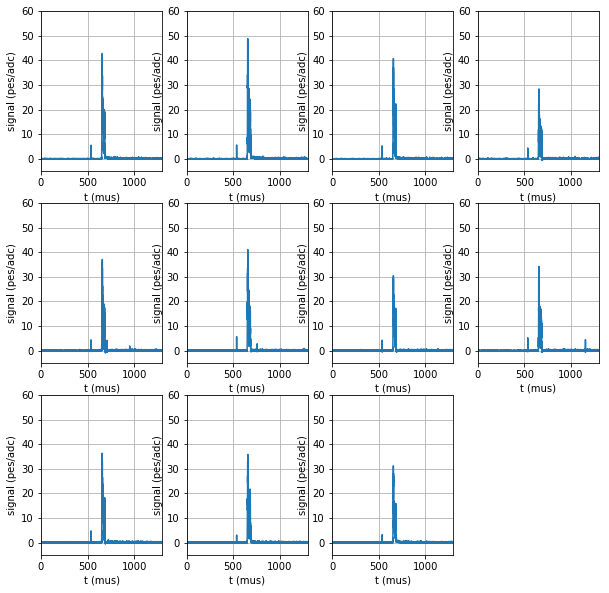

In [101]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  60)

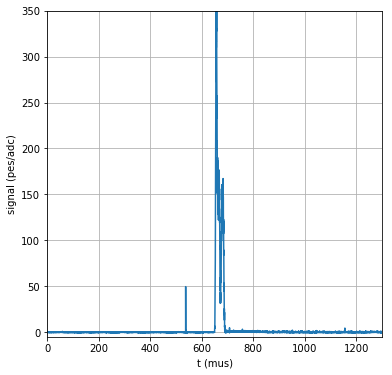

In [102]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=350)

In [103]:
epm.find_s1()

number of peaks = 1
S12 number = 0, samples = 12 sum in pes =287.16255346131715
time vector (mus) = [ 537.075  537.1    537.125  537.15   537.175  537.2    537.225  537.25
  537.275  537.3    537.325  537.35 ]
energy vector (pes) = [ 10.4426949   25.8651377   41.25512152  49.62001976  47.11299942
  37.49087244  26.13192765  17.21102009  11.61002686   9.01715768
   6.92199969   4.48357577]


1

In [104]:
epm.find_s2()

number of peaks = 2
S12 number = 0, samples = 41 sum in pes =206792.95696777356
time vector (mus) = [ 650.1125      651.1125      652.1125      653.1125      654.1125
  655.1125      656.1125      657.1125      658.1125      659.1125
  660.1125      661.1125      662.1125      663.1125      664.1125
  665.1125      666.1125      667.1125      668.1125      669.1125
  670.1125      671.1125      672.1125      673.1125      674.1125
  675.1125      676.1125      677.1125      678.1125      679.1125
  680.1125      681.1125      682.1125      683.1125      684.1125
  685.1125      686.1125      687.1125      688.1125      689.1125
  690.21293103]
energy vector (pes) = [   158.20838821    732.19084451   2650.1088742    6217.06117774
   9740.38696121  11681.00579254  12987.46643769  13367.39835656
  11363.19720673   9167.05507207   6798.59859053   7012.77230104
   5948.45395494   5750.00118129   5448.213647     5879.39598418
   6009.00744385   6491.68632314   6202.54140025   4908.51936811
 

2

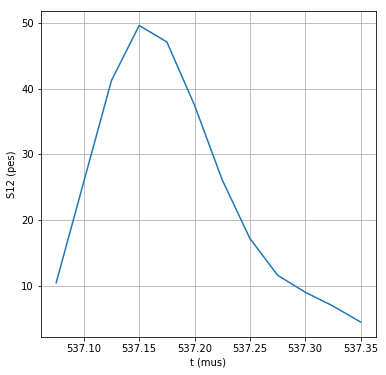

In [105]:
plot_s12(epm.S1)

In [106]:
epm.s1f

{0: S12Features(tmin=537075.0, tmax=537350.0, tpeak=537150.0, etot=287.16255346131715, epeak=49.620019757374799, width=275.0)}

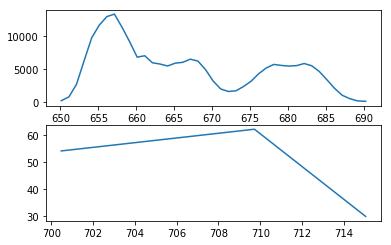

In [107]:
plot_s12(epm.S2)

In [108]:
epm.s2f

{0: S12Features(tmin=650112.5, tmax=690212.93103448278, tpeak=657112.5, etot=206792.95696777356, epeak=13367.398356560359, width=40100.431034482783),
 1: S12Features(tmin=700476.25, tmax=715043.18181818177, tpeak=709721.875, etot=145.78700265007825, epeak=62.020462095571197, width=14566.931818181765)}

In [109]:
epm.find_ns1()

10

In [110]:
dt = epm.s2f[0].tpeak - epm.s1f[0].tpeak

In [111]:
dt/units.mus

119.96250000000001

In [130]:
event=6
epm.calibrated_pmt_and_csum(event, pmtrwf)

106156.00674686572

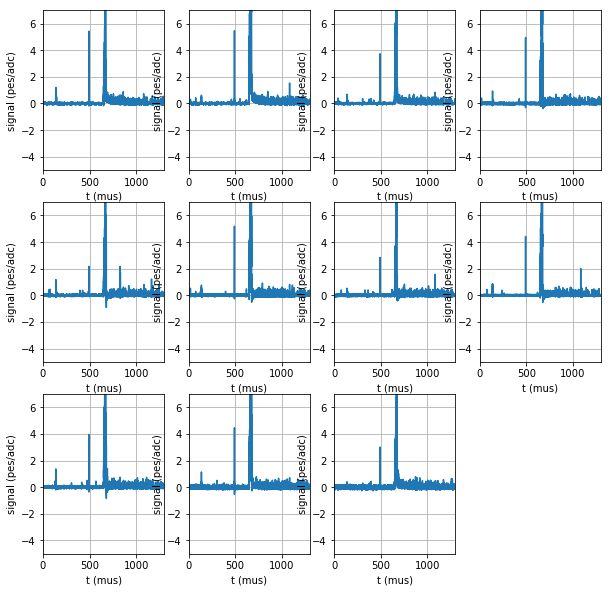

In [131]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  7)

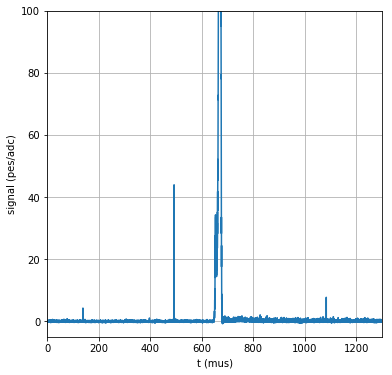

In [132]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=100)

In [133]:
epm.find_s1()
epm.find_ns1()

number of peaks = 2
S12 number = 0, samples = 7 sum in pes =26.246105974621795
time vector (mus) = [ 138.25   138.275  138.3    138.325  138.35   138.375  138.4  ]
energy vector (pes) = [ 3.25844206  3.88502091  4.20116194  4.07818148  3.4613347   3.85529338
  3.50667151]
S12 number = 1, samples = 12 sum in pes =260.4799437214684
time vector (mus) = [ 492.125  492.15   492.175  492.2    492.225  492.25   492.275  492.3
  492.325  492.35   492.375  492.4  ]
energy vector (pes) = [  4.6806039   15.04613764  29.33726576  40.52412668  43.92707723
  39.53960164  31.25301494  22.26838464  14.8983057    9.23163151
   5.99587406   3.77792003]


9

In [134]:
epm.find_s2()

number of peaks = 1
S12 number = 0, samples = 31 sum in pes =103526.03666114509
time vector (mus) = [ 648.70375     649.7625      650.7625      651.7625      652.7625
  653.7625      654.7625      655.7625      656.7625      657.7625
  658.7625      659.7625      660.7625      661.7625      662.7625
  663.7625      664.7625      665.7625      666.7625      667.7625
  668.7625      669.7625      670.7625      671.7625      672.7625
  673.7625      674.7625      675.7625      676.7625      677.7625
  678.84833333]
energy vector (pes) = [    67.47872086    176.81102896    370.4199126     734.21955785
   1008.02091467   1110.46229805   1025.66248302    878.53980842
    741.0633263     828.65517871    886.49069258   1102.17462562
   1307.54366786   1737.03633601   2233.21517375   3500.22032523
   5860.06587335   8829.52505806  10358.39987776  10780.77089479
   9601.23243243   8169.65344535   7614.18571467   7289.01940402
   6376.48351765   4996.77495066   3382.97164517   1627.34712597
    6

1

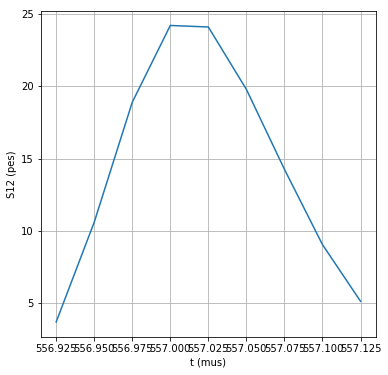

In [117]:
plot_s12(epm.S1)

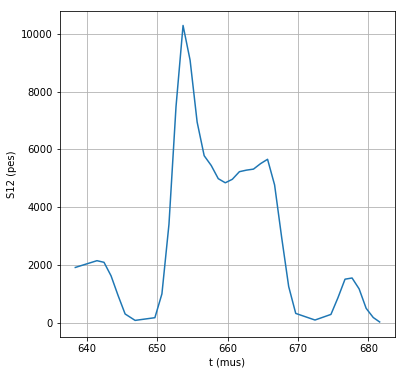

In [118]:
plot_s12(epm.S2)

In [119]:
epm.s1f

{0: S12Features(tmin=556925.0, tmax=557125.0, tpeak=557000.0, etot=129.74982592845237, epeak=24.205077544941336, width=200.0)}

In [120]:
epm.s2f

{0: S12Features(tmin=638386.25, tmax=681605.0, tpeak=653687.5, etot=115782.60591064629, epeak=10287.786869198941, width=43218.75)}

In [170]:
def pmp(epm, event):
    epm.calibrated_pmt_and_csum(event, pmtrwf)
    
    plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60, figsize=(4,4))

    plt.show()

        
    print('+++S1+++++')
    epm.find_s1()
    if len (epm.S1) == 0:
        print('S1 == 0')
        return 0
    
    plot_s12(epm.S1, figsize=(5,5))
    plt.show()
    

    print('+++S2+++++')
    epm.find_s2()
    plot_s12(epm.S2, figsize=(5,5))
    plt.show()
    
    print('s1f = {} '.format(epm.s1f[0]))
    for peak in epm.s2f:
        print('s2f = {} '.format(epm.s2f[peak]))
        dt = epm.s2f[peak].tpeak - epm.s1f[0].tpeak
        print('dt = {} mus'.format(dt/units.mus))
    

In [124]:
def pmp_plot(epmx):
    plot_pmt_signals_vs_time_mus(epmx.CAL_PMT,
                             epmx.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10, figsize=(4,4))
    plt.show()
    plot_signal_vs_time_mus(epmx.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60,figsize=(4,4))
    plt.show()
    plot_s12(epmx.S1)
    plt.show(
    plot_s12(epmx.S2))
    plt.show()

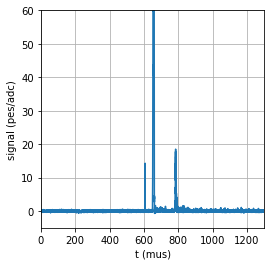

+++S1+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =67.98757874727912
time vector (mus) = [ 606.575  606.6    606.625  606.65   606.675  606.7    606.725]
energy vector (pes) = [  6.08899448  10.69903827  14.06385231  14.2875479   11.50971637
   7.36478189   3.97364753]


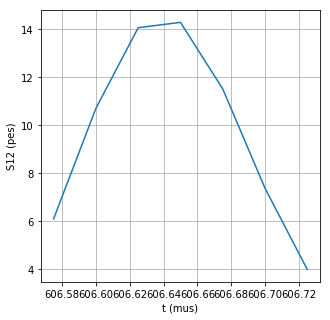

+++S2+++++
number of peaks = 2
S12 number = 0, samples = 12 sum in pes =54919.03718187776
time vector (mus) = [ 650.3725  651.3875  652.3875  653.3875  654.3875  655.3875  656.3875
  657.3875  658.3875  659.3875  660.3875  661.4525]
energy vector (pes) = [   236.3381609    1233.0779551    2160.43447603   3022.69212614
   4981.29536507   8039.91007587  10657.53448527  12572.11182535
   8511.19071355   3045.48027831    442.2314736      16.74024668]
S12 number = 1, samples = 11 sum in pes =2989.889127639504
time vector (mus) = [ 780.656875  781.6875    782.6875    783.6875    784.6875    785.6875
  786.6875    787.6875    788.6875    789.821875  791.78125 ]
energy vector (pes) = [  89.61950071  201.29241663  382.80136324  547.77826354  530.56138185
  447.14578474  282.19163948  233.64876161  163.02632693   76.45425121
   35.3694377 ]


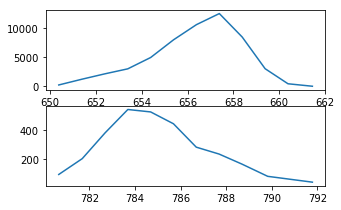

s1f = S12Features(tmin=606575.0, tmax=606725.0, tpeak=606650.0, etot=67.987578747279116, epeak=14.287547901930552, width=150.0) 
s2f = S12Features(tmin=650372.5, tmax=661452.5, tpeak=657387.5, etot=54919.037181877757, epeak=12572.111825350119, width=11080.0) 
dt = 50.7375 mus
s2f = S12Features(tmin=780656.875, tmax=791781.25, tpeak=783687.5, etot=2989.8891276395038, epeak=547.77826354408478, width=11124.375) 
dt = 177.0375 mus


In [178]:
pmp(epm,event=37)

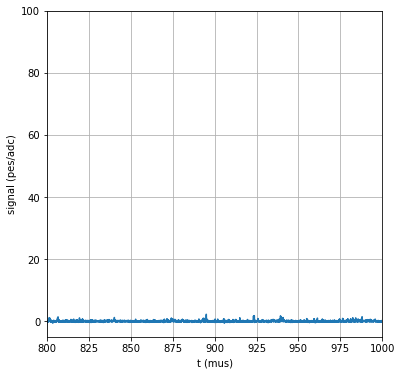

In [161]:
event=26
epm.calibrated_pmt_and_csum(event, pmtrwf)
plot_signal_vs_time_mus(epm.csum, 
                            t_min=800, 
                            t_max=1000, 
                            signal_min=-5, 
                            signal_max=100)

In [ ]:
pmp(epm,event=5)

In [ ]:
pmp(epm,event=6)

In [ ]:
pmp(epm,event=8)

In [ ]:
pmp(epm,event=9)